# Introduction to SciKit Learn(SkLearn)
This notebook demonstrates some of the most useful functions of the Scikit Learn Library

What's Covered:
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Chose the right estimator/algorithm for our problems
3. Fit the model/algorithms and us eit to make predictions on our data.
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!!!

## 0. An end-to-end Scikit-learn Workflow

In [1]:
# 1.Getting Data ready
import pandas as pd
heart_disease = pd.read_csv("hd.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#Create x(features matrix)
x = heart_disease.drop("target", axis=1)

#Create y(labels matrix)
y = heart_disease["target"]

In [3]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf.fit(x_train, y_train);

In [6]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [7]:
# Evaluate the Model
clf.score(x_train, y_train)

1.0

In [8]:
clf.score(x_test, y_test)

0.8852459016393442

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.97      0.82      0.89        34

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[26,  1],
       [ 6, 28]], dtype=int64)

In [12]:
accuracy_score(y_test, y_preds)

0.8852459016393442

In [13]:
# Improve Model
#Try different amount of n_estimators
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying Model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying Model with 10 estimators...
Model accuracy on test set: 88.52%

Trying Model with 20 estimators...
Model accuracy on test set: 81.97%

Trying Model with 30 estimators...
Model accuracy on test set: 85.25%

Trying Model with 40 estimators...
Model accuracy on test set: 86.89%

Trying Model with 50 estimators...
Model accuracy on test set: 85.25%

Trying Model with 60 estimators...
Model accuracy on test set: 81.97%

Trying Model with 70 estimators...
Model accuracy on test set: 83.61%

Trying Model with 80 estimators...
Model accuracy on test set: 88.52%

Trying Model with 90 estimators...
Model accuracy on test set: 86.89%



In [14]:
#Save model and load it
import pickle

pickle.dump(clf, open("random-forest-model1.pkl", "wb"))


In [15]:
loaded_model = pickle.load(open("random-forest-model1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8688524590163934

# 1.Getting our data ready to be used with machine learning
Three main things we have to do:

    1.Split the data into features and labels (Usually 'x' and 'y')
    2.Filling(Imputing) ordisregarding missing values
    3.Converting non-numerical values to numerical values(also called feature encoding)

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [18]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [19]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure data is all numerical

In [20]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
len(car_sales)

1000

In [22]:
x=car_sales.drop("Price", axis=1)
y=car_sales["Price"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
# Building ML Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model.fit(x_train, y_train)
#model.score(x_test, y_test)

In [25]:
#Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [27]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

In [28]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
model.score(x_test, y_test)

0.3235867221569877

## 1.2 What if there are missing values?

1. Fill them with some value(imputation)
2. Remove the samples with missing values

In [30]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [31]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [32]:
#Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Fill missing values with Pandas


In [33]:
# Missing values Nan
car_sales_missing["Make"].fillna("missing", inplace=True)
# Missing colours
car_sales_missing["Colour"].fillna("missing", inplace=True)
#Missing Odometer
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

car_sales_missing["Doors"].fillna(4, inplace=True)


In [34]:
#Remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [35]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [36]:
#Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Fill missing values with Scikit Learn

In [37]:
car_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [38]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
car_missing.dropna(subset=["Price"], inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
x = car_missing.drop("Price", axis=1)
y = car_missing["Price"]

In [41]:
# Fill missing values with Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

#Create an Imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

#Transform Data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [42]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [43]:
#Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [44]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(transformed_x, y, test_size=0.2)

In [45]:
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)
model.score(Xtest, Ytest)

0.21990196728583944

# 2.Choosing the right estimator/algorithm for your problem
some things to note:

    * Sklearn refers to machine learning models, algorithms as estimators
    * Classification problem-predicting a category
    * Regression problem -predicting a number

## 2.1 Picking a model for Regression problem
Let's use California Housing Dataset

In [46]:
#Get California Housing dataset
#from sklearn.datasets import fetch_california_housing
#housing = fetch_california_housing()
#housing;
housing = pd.read_csv("california_housing.csv")
housing = housing.drop("ocean_proximity", axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [47]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [48]:
housing["total_bedrooms"].fillna(housing["total_bedrooms"].mean(), inplace=True)

In [49]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [50]:
#Import Algo
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
x = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size=0.2)

#Instantiate and fit the model
model = Ridge()
model.fit(xtrain, ytrain)

#Check model score
model.score(xtest, ytest)

0.6144007397055632

In [51]:
#from sklearn import svm
#model = svm.SVR()
#model.fit(xtrain, ytrain)
#model.score(xtest, ytest)

In [52]:
from sklearn import linear_model
model = linear_model.Lasso()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.614399576475222

In [53]:
# Ensemble Model-RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
x = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size=0.2)

#Instantiate and fit the model
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

#Check model score
model.score(xtest, ytest)

0.8095814935486373

## 2.2 Picking a model for Classification problem

In [54]:
heart_disease = pd.read_csv("hd.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [56]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)
clf = LinearSVC(max_iter=10000)
clf.fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

C:\Users\abhis\Desktop\UdemyMLDS\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [57]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.8524590163934426

## 3.1 Fit the model/algorithm on our data and use it to make predictions

In [58]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier()

#Fitting the model to the data
clf.fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.8524590163934426

In [59]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [60]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Make predictions

2 Ways:
1. predict()
2. predict_proba()

In [61]:
Xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [62]:

clf.predict(Xtest)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
np.array([Ytest])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [64]:
Y_preds = clf.predict(Xtest)
np.mean(Y_preds == Ytest)

0.8524590163934426

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_preds, Ytest)

0.8524590163934426

In [66]:
#Predict_proba: will return probabilities of a classification label
clf.predict_proba(Xtest[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [67]:
clf.predict(Xtest[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [68]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [69]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8095814935486373

In [70]:
y_pred = model.predict(xtest)
y_pred[:10]

array([ 52145.  ,  69383.  , 471748.48, 261277.  , 282425.  , 164600.  ,
       282003.12, 175400.02, 282181.05, 474482.71])

In [71]:
np.array(ytest[:10])

array([ 47700.,  45800., 500001., 218600., 278000., 158700., 198200.,
       157500., 340000., 446600.])

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_pred)

32409.702318313957

## 4. Evaluating a ML Model

3 Ways to evaluate Sklearn model:

    1. Estimator's built-in 'score()' method
    2. The 'scoring' parameter
    3. Problem-specific metric functions

In [73]:
# Scoring Parameter
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier()

#Fitting the model to the data
clf.fit(Xtrain, Ytrain)
clf.score(Xtest, Ytest)

0.8524590163934426

In [74]:
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [75]:
np.random.seed(42)

#single training test score
clf_single_score = clf.score(Xtest, Ytest)

#5 fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [76]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [77]:
np.mean(cross_val_score(clf, x, y, cv=5))

0.8183606557377049

**Area under the Receiver Operating Characteristic curve (AUC)**

ROC curve is a comparison of a model's true positive rate v/s model's false positive rate

* Truth positive = model predicts 1 when target is 1
* False positive = model predicts 1 when target is 0
* Truth Negative = model predicts 0 when target is 0
* False negative = model predicts 0 when target is 1

In [78]:
from sklearn.metrics import roc_curve

#Make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [79]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [80]:
#Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

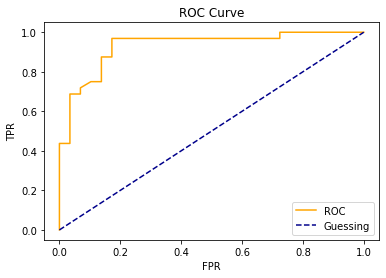

In [81]:
# Create a function to plot ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a Roc curve given the fpr and tpr of a model
    """
    #Plot ROC Curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    #plot line with no preditive power
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)    
    

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

**Confusion Matrix**

A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving us an idea of where the model is getting confused.

In [83]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)

In [84]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [85]:
#Visulaize the Confusion Matric with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


In [86]:
# TO install Seaborn in our environment
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

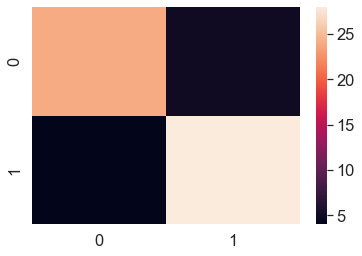

In [87]:
#Make our Confusion Matrix more visual with Seaborn's heatmap()
import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)
#create a CM
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

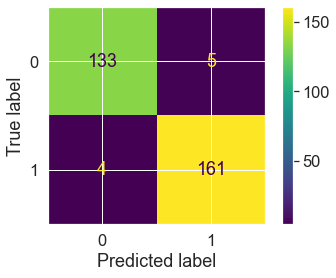

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X=x, y=y);

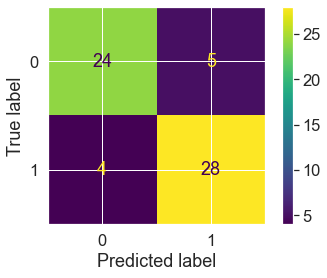

In [89]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

In [90]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.2.2 Regression model evaluation metrics
We're going to cover:
* R^2 or coefficient of determination
* Mean Absolute error (MAE)
* Mean Squared Error (MSE)

In [91]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [92]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [93]:
model.score(xtest, ytest)

0.8095814935486373

In [94]:
from sklearn.metrics import r2_score
ytest_mean = np.full(len(ytest), ytest.mean())
ytest_mean[:10]

array([205500.30959302, 205500.30959302, 205500.30959302, 205500.30959302,
       205500.30959302, 205500.30959302, 205500.30959302, 205500.30959302,
       205500.30959302, 205500.30959302])

In [95]:
r2_score(y_true=ytest, y_pred=ytest_mean)

0.0

**MAE**

* MAE is the average of the absolute differences between predictions and actual values
* It gives an idea of how wrong our model's predictions are

In [96]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(xtest)
mae = mean_absolute_error(ytest, y_preds)
mae

32409.702318313957

In [97]:
df = pd.DataFrame(data={"actual values":ytest, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,47700.0,52145.00,4445.00
3024,45800.0,69383.00,23583.00
15663,500001.0,471748.48,-28252.52
20484,218600.0,261277.00,42677.00
9814,278000.0,282425.00,4425.00


In [98]:
np.abs(df["differences"]).mean()

32409.70231831402

**MSE**

* mean of the square of the errors between actual and predicted values.

In [99]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_preds)

In [100]:
mse

2495261204.7708845

In [101]:
df["differences^2"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,differences^2
20046,47700.0,52145.00,4445.00,1.975802e+07
3024,45800.0,69383.00,23583.00,5.561579e+08
15663,500001.0,471748.48,-28252.52,7.982049e+08
20484,218600.0,261277.00,42677.00,1.821326e+09
9814,278000.0,282425.00,4425.00,1.958062e+07


### 4.2.3 Finally using 'scoring' parameter

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)


In [103]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [104]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [105]:
#Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [106]:
#Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

Let's see the 'scoring' parameter being used for regression problem

In [107]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

model = RandomForestRegressor(n_estimators=100)

In [109]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.5872438629730136

In [110]:
#Mean squared error
cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-5603384970.181309

In [111]:
#Mean absolute error
cv_mae = cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-52658.511841569765

In [112]:
cv_mae, cv_mse

(array([-57213.7429782 , -44161.80266279, -56599.98988372]),
 array([-6.40456814e+09, -3.73714205e+09, -6.66844472e+09]))

## 4.3 Using different evaluation metrics with Scikit-learn
* Accuracy we can use accuracy_score()
* Precision we can use precision_score()
* Recall we can use recall_score()
* F1 we can use f1_score()

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 32409.70
MSE: 2495261204.77


## 5. Improving a ML Model

First predictions = baseline predictions.
First model = baseline model.

Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model that we can adjust to (potentially) improve its ability to find patterns

In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [116]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}